In [1]:
import os
cwd = os.getcwd()
jaxqualin_path = os.path.join(cwd, os.pardir, os.pardir)

In [2]:
import sys
sys.path.insert(0, jaxqualin_path)

In [3]:
import postprocess
import plot
import QuasinormalMode
import spheroidal

from postprocess import *
from plot import *
from QuasinormalMode import *
from spheroidal import *

2023-08-31 17:35:02.828051: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-08-31 17:35:02.911920: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-08-31 17:35:02.924245: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIB

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import os
from importlib import reload

In [5]:
reload(postprocess)
reload(plot)
reload(QuasinormalMode)
reload(spheroidal)
from postprocess import *
from plot import *
from QuasinormalMode import *
from spheroidal import *

In [6]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [14]:
ROOT_PATH = jaxqualin_path
FIT_SAVE_PATH = os.path.join(ROOT_PATH, "pickle/fits")
PLOT_PATH_ROOT = os.path.join(ROOT_PATH, f"plots/")
PLOT_PATH = os.path.join(PLOT_PATH_ROOT, "paper_plots/")

In [8]:
SXSnum = "0305"
l = 2
m = 2

h, Mf, af, Level, retro = get_waveform_SXS(SXSnum, l, m)

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/metadata.json


2023-08-31 17:35:25.359049: E external/org_tensorflow/tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [9]:
t0_arr = np.linspace(0, 50, num = 501)
qnm_fixed_list = long_str_to_qnms("", Mf, af)
N_free_list = [5, 6, 7, 8, 9, 10]
nonconvergence_cut = False

N_fix = len(qnm_fixed_list)
run_string_prefix = f"SXS{SXSnum}_lm_{l}.{m}"

In [10]:
fitters = [QNMFitVaryingStartingTime(
                            h, t0_arr, N_free = N_free,
                            qnm_fixed_list = qnm_fixed_list, load_pickle = True,
                            run_string_prefix = run_string_prefix, random_initial = True,
                            initial_num = 10
                                  ) for N_free in N_free_list]

In [11]:
for fitter in fitters:
    fitter.do_fits()

reloaded fit SXS0305_lm_2.2_N_5_t0_0.0000_50.0000_501 from an old run.
reloaded fit SXS0305_lm_2.2_N_6_t0_0.0000_50.0000_501 from an old run.
reloaded fit SXS0305_lm_2.2_N_7_t0_0.0000_50.0000_501 from an old run.
reloaded fit SXS0305_lm_2.2_N_8_t0_0.0000_50.0000_501 from an old run.
reloaded fit SXS0305_lm_2.2_N_9_t0_0.0000_50.0000_501 from an old run.
reloaded fit SXS0305_lm_2.2_N_10_t0_0.0000_50.0000_501 from an old run.


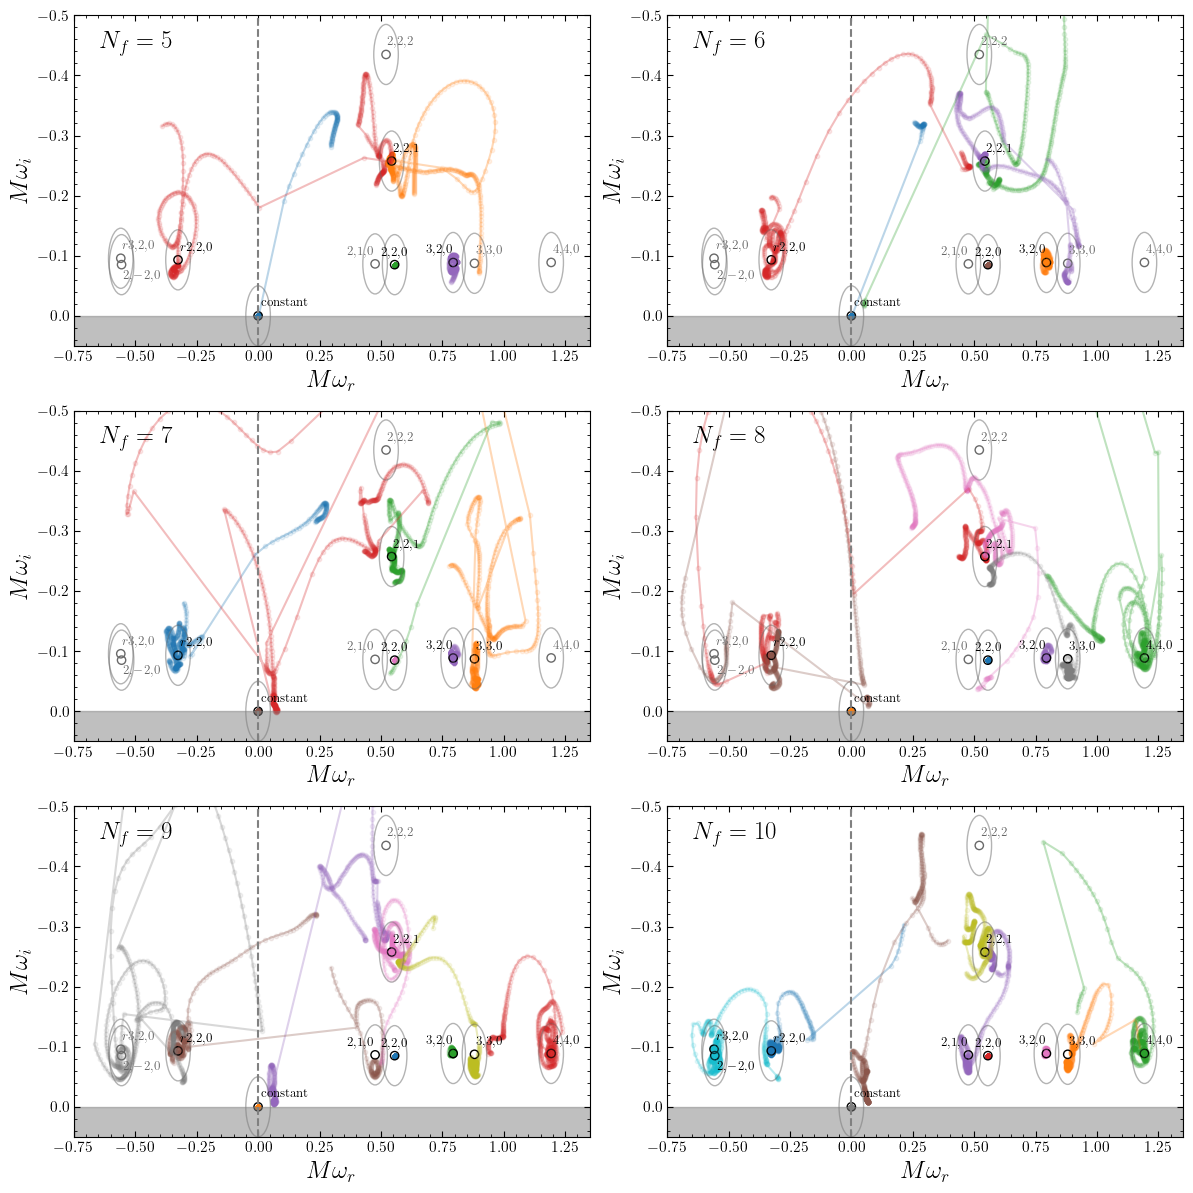

In [15]:
fig, axs = plt.subplots(3, 2, figsize = (12, 12))

for i, (N_free, ax) in enumerate(zip(N_free_list, axs.reshape(-1))):
    result = fitters[i].result_full
    plot_omega_free(result, scatter_size = 10, ax = ax, scatter_alpha = 0.1,
                    color_indicate = False)
    ax.set_xlim(-0.75, 1.35)
    ax.set_ylim(0.05, -0.5)
    all_modes = long_str_to_qnms("2.2.0_3.2.0_3.3.0_2.1.0_2.2.1_2.2.2_2.-2.0_constant_"
                                 "4.4.0_-2.2.0_3.-2.0", Mf, af)
    # all_modes = long_str_to_qnms("2.2.0_5.5.0_-2.2.0_3.3.0_4.4.0_constant_5.4.0_2.2.0x2.2.0_4.4.1", Mf, af)
    if N_free in [5, 6]:
        present_modes = ['3.2.0', '2.2.0', '2.2.1', '2.-2.0', 'constant']
    elif N_free in [7]:
        present_modes = ['3.2.0', '2.2.0', '2.2.1', '3.3.0', '2.-2.0', 'constant']
    elif N_free in [8]:
        present_modes = ['3.2.0', '2.2.0', '2.2.1', '3.3.0', '4.4.0', '2.-2.0', 'constant']
    elif N_free in [9]:
        present_modes = ['3.2.0', '2.2.0', '2.2.1', '3.3.0', '4.4.0', '2.-2.0', 'constant', '2.1.0']
    elif N_free in [10]:
        present_modes = ['3.2.0', '2.2.0', '-2.2.0', '2.2.1', '3.3.0', '4.4.0', '3.-2.0', '2.-2.0', 'constant', '2.1.0']
    plot_predicted_qnms(ax, 
                        all_modes,
                        ellipse_qnm_list=all_modes,
                        edgecolor = 'dimgray',
                        ellipse_facecolor='none',
                        ellipse_edgecolor='dimgray',
                        change_lim=False,
                        label_offset=(0,0),
                        present_modes = present_modes,
                        expand_points = (1.1, 1.9)
                        )
    
    ax.text(0.05, 0.95, f"$N_f = {N_free}$", 
            transform=ax.transAxes, 
            fontsize=18, 
            verticalalignment='top')

fig.tight_layout()
plt.savefig(os.path.join(PLOT_PATH, f"SXS0305_lm_22_agnostic_varying_Nf.pdf"), 
            bbox_inches = 'tight')

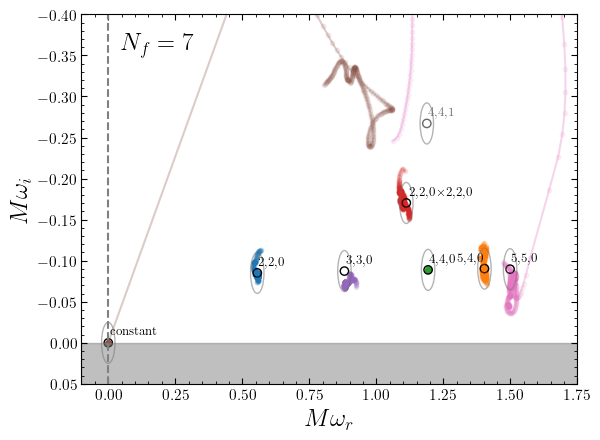

In [21]:
fig, ax = plt.subplots()

result = fitters[2].result_full
plot_omega_free(result, scatter_size = 10, ax = ax, scatter_alpha = 0.1,
                color_indicate = False)
ax.set_xlim(-0.1, 1.75)
ax.set_ylim(0.05, -0.4)
# all_modes = long_str_to_qnms("2.2.0_3.2.0_3.3.0_2.1.0_2.2.1_2.2.2_2.-2.0_constant_"
#                                 "4.4.0_2.0.0", Mf, af)
all_modes = long_str_to_qnms("2.2.0_5.5.0_3.3.0_4.4.0_constant_5.4.0_2.2.0x2.2.0_4.4.1", Mf, af)
all_modes_retro = long_str_to_qnms("2.2.0", Mf, af)

# present_modes = ['2.2.1', '3.3.0', '3.2.0', '2.-2.0', 'constant', '2.1.0', '4.4.0', '2.2.0']
present_modes = ['2.2.0', '5.5.0', '3.3.0', '4.4.0', 'constant', '5.4.0', '2.2.0x2.2.0']
# present_modes_retro = ['2.2.0']
plot_predicted_qnms(ax, 
                    all_modes,
                    all_modes_retro,
                    ellipse_qnm_list=all_modes,
                    edgecolor = 'dimgray',
                    ellipse_facecolor='none',
                    ellipse_edgecolor='dimgray',
                    change_lim=False,
                    label_offset=(0,0),
                    present_modes = present_modes,
                #     present_modes_retro = present_modes_retro,
                    expand_points = (1.1, 1.9)
                    )

# ax.text(0.05, 0.95, f"$N_f = 10$", 
#         transform=ax.transAxes, 
#         fontsize=18, 
#         verticalalignment='top')

ax.text(0.08, 0.95, f"$N_f = 7$", 
        transform=ax.transAxes, 
        fontsize=18, 
        verticalalignment='top')

# plt.savefig(os.path.join(PLOT_PATH, f"SXS0305_lm_22_agnostic_Nf_10.pdf"), 
#             bbox_inches = 'tight')
plt.savefig(os.path.join(PLOT_PATH, f"SXS0305_lm_44_agnostic_Nf_10.pdf"), 
            bbox_inches = 'tight')